# # Visualization

# ## 00. load package 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt7
import colorsys

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
sns.set_style('whitegrid')

/Users/hwan/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# ## 00. load data

In [2]:
pd.DataFrame(sns.get_dataset_names()).T   # available datasets

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,anagrams,anscombe,attention,brain_networks,car_crashes,diamonds,dots,dowjones,exercise,flights,fmri,geyser,glue,healthexp,iris,mpg,penguins,planets,seaice,taxis,tips,titanic


In [3]:
# penguine data: df_peng
df_peng = sns.load_dataset('penguins')
display(df_peng.shape, df_peng.head(1), df_peng.tail(1))

(344, 7)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


# ## 01. KDE plot

#### #### single plot

<AxesSubplot:xlabel='body_mass_g', ylabel='Density'>

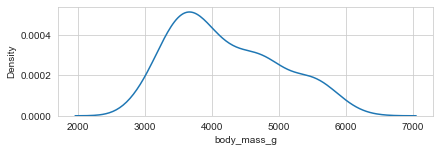

In [4]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6,2),
                        constrained_layout=True,
                        sharex=True, sharey=True)
sns.kdeplot(x='body_mass_g', data=df_peng, ax=axs)

#### #### plots: (1 row, 2 columns)

***************************************************
** Axes: AxesSubplot(0.125,0.125;0.352273x0.755) AxesSubplot(0.547727,0.125;0.352273x0.755)
***************************************************


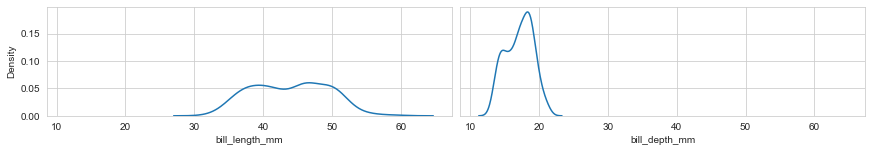

In [5]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,2),   # nrows, ncols, figsize 설정
                        constrained_layout=True,            # subplot들 간의 간격을 최적으로 자동 조정
                        sharex=True, sharey=True)           # x축공유, y축공유 설정

sns.kdeplot(x='bill_length_mm', data=df_peng, ax=axs[0])
sns.kdeplot(x='bill_depth_mm', data=df_peng, ax=axs[1])

print('***************************************************')
print('** Axes:', axs[0], axs[1])
print('***************************************************')

plt.show()

# ## 02. Accumulative KDE plot

# #### single plot

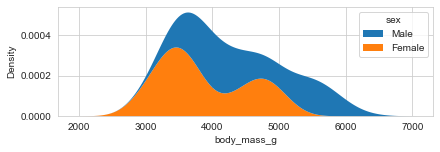

In [6]:
fig, axs = plt.subplots(figsize=(6,2), constrained_layout=True, sharex=True, sharey=True)

# 'multiple' parameter
sns.kdeplot(x='body_mass_g', data=df_peng, 
            hue='sex', multiple='stack', 
            alpha=1, linewidths=0, ax=axs)

plt.show()

# #### 다양한 parameter 활용

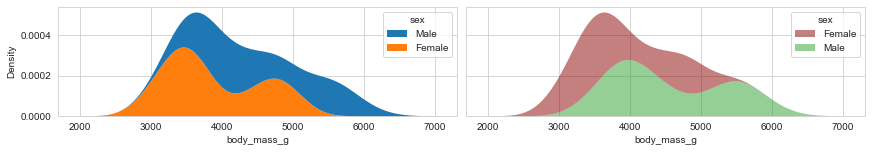

In [7]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,2), 
                        constrained_layout=True, 
                        sharex=True, sharey=True)

# basic stacked plot
sns.kdeplot(x='body_mass_g', data=df_peng, hue='sex', multiple='stack', 
            alpha=1, linewidths=0, ax=axs[0])

# 다양한 parameter 활용: palette, hue_order 등
sns.kdeplot(x='body_mass_g', data=df_peng, hue='sex', multiple='stack', 
            alpha=0.5, linewidths=0, ax=axs[1],
            palette=['darkred', 'C2'], hue_order=['Female', 'Male'])

plt.show()

# ## 03. Accumulative KDE plot - Details

##### UDF: set_hls( )
 - 기능: ...
 - h: dh >> change in hue (float)
 - l: dl >> change in Lightness (float)
 - s: ds >> change in Saturation (float)

#### settings

In [8]:
def set_hls(c, dh=0, dl=0, ds=0, dalpha=0):
    """
    c : (array -like, str) color in RGB space
    dh : (float) change in Hue
         default = 0
    dl : (float) change in Lightness
         default = 0
    ds : (float) change in Saturation
         default = 0
    dalpha : opacity(투명도)
         default = 0
         >> 보통 alpha 값이 1이면 완전 불투명, 0이면 완전 투명
    """

    # 입력된 color를 RGBA numpy array로 변환
    c_rgba = mcolors.to_rgba(c)
    
    # RGB와 alpha 분리
    c_rgb = c_rgba[:3]
    alpha = c_rgba[3]
    
    # RGB 색공간을 HLS 색공간으로 변환 후 입력된 변화 적용
    c_hls = colorsys.rgb_to_hls(*c_rgb)
    h = c_hls[0] + dh
    l = max(min(c_hls[1] + dl, 1), 0)     # 0~1 범위를 넘지 않도록 제어
    s = max(min(c_hls[2] + ds, 1), 0)     # 0~1 범위를 넘지 않도록 제어
    
    # HLS 색공간에서 변경된 색을 RGB 색공간으로 변환
    c_rgb_new = colorsys.hls_to_rgb(h, l, s)
    alpha = max(min(alpha+dalpha, 1), 0)  # 0~1 범위를 넘지 않도록 제어
    
    return np.append(c_rgb_new, alpha) # alpha 추가하여 return

# #### 기존

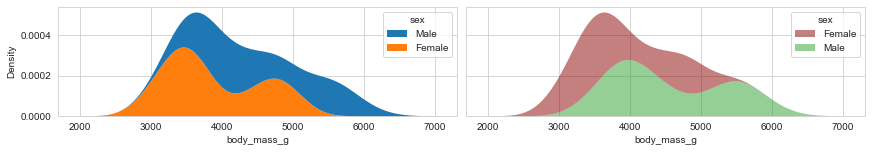

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,2), 
                        constrained_layout=True, 
                        sharex=True, sharey=True)

# basic stacked plot
sns.kdeplot(x='body_mass_g', data=df_peng, hue='sex', multiple='stack', 
            alpha=1, linewidths=0, ax=axs[0])

# 다양한 parameter 활용: palette, hue_order 등
sns.kdeplot(x='body_mass_g', data=df_peng, hue='sex', multiple='stack', 
            alpha=0.5, linewidths=0, ax=axs[1],
            palette=['darkred', 'C2'], hue_order=['Female', 'Male'])

plt.show()

<AxesSubplot:xlabel='body_mass_g', ylabel='Density'>

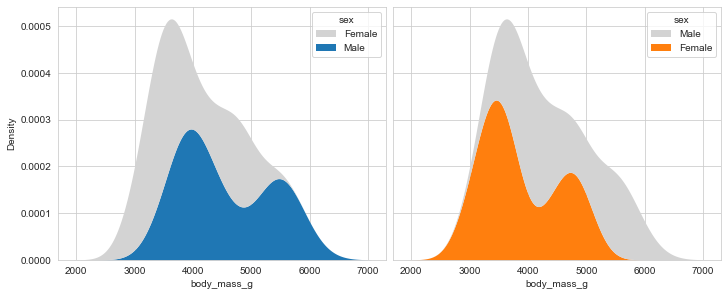

In [10]:
df_peng = sns.load_dataset('penguins')

fig, axs = plt.subplots(ncols=2, figsize=(10,4), constrained_layout=True, 
                        sharex=True, sharey=True)

sns.kdeplot(x='body_mass_g', data=df_peng, multiple='stack', 
            palette=['lightgrey', 'C0'], alpha=1, linewidths=0,
            hue='sex', ax=axs[0], hue_order=['Female', 'Male'])

sns.kdeplot(x='body_mass_g', data=df_peng, multiple='stack',
            palette=['lightgrey','C1'], alpha=1, linewidths=0,
            hue='sex', ax=axs[1])

In [11]:
# 성별 밀도 함수 객체 색상 변경
sexs = [axs[0].collections[0], axs[1].collections[0]]
for p in sexs:
    fc = p.get_facecolor()
    p.set_facecolor(set_hls(fc, dh=0.8, ds=-0.3, dalpha=0.2))

# handles 변경을 legend에 반영
handles = [axs[0].collections[1], axs[0].collections[0], axs[1].collections[0]]
labels = ["all sexs", "males", "females"]
axs[1].legend(handles=handles, labels=labels, loc="upper right")

plt.show()

# #### 03. Visualization - Bar plot

#### 유채색 vs. 무채색
 - 색을 이루는 구성 요소 3가지 >> 명도(Lightness), 색상(Hue), 채도(Saturation) >> HLS(hls)
 - 무채색: 3가지 중 명도만 있는 경우
   - 채도가 0이 되어 색상이 드러나지 않으면 무채색이 됨
 - 채도를 아주 살짝 남기면 색상만 약하게 전달 가능

#### set_hls( ) 함수
 - c: (array-like, str) color in RGB space
 - dh: (float) change in Hue // default=0
 - dl: (float) change in Lightness // default=0
 - ds: (float) change in Saturation // default=0

#### 예시 코드

<AxesSubplot:xlabel='count', ylabel='species'>

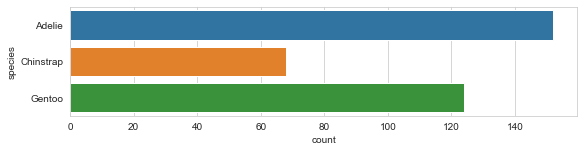

In [12]:
# data
df_peng = sns.load_dataset("penguins")

# figure + axes
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 2), constrained_layout=True)

# draw countplot
sns.countplot(y="species", data=df_peng, ax=axs)

# #### step by step

In [13]:
axs

<AxesSubplot:xlabel='count', ylabel='species'>

In [14]:
axs.patches   # 3 bars = 3 patches

<Axes.ArtistList of 3 patches>

In [15]:
# patch: Rectangle(), width, height, angle 을 요소로 가지고 있음.
for idx, p in enumerate(axs.patches): 
    print(idx, '//', p)

0 // Rectangle(xy=(0, -0.4), width=152, height=0.8, angle=0)
1 // Rectangle(xy=(0, 0.6), width=68, height=0.8, angle=0)
2 // Rectangle(xy=(0, 1.6), width=124, height=0.8, angle=0)


In [16]:
# axes.patches.get_fc(): facecolor 4개 요소를 리턴 >> dh, dl, ds, alpha
for idx, p in enumerate(axs.patches): 
    print('idx:\t\t', idx)
    print('p:\t\t', p)
    print('p.get_fc():\t', p.get_fc())
    print()

idx:		 0
p:		 Rectangle(xy=(0, -0.4), width=152, height=0.8, angle=0)
p.get_fc():	 (0.19460784313725488, 0.45343137254901944, 0.632843137254902, 1.0)

idx:		 1
p:		 Rectangle(xy=(0, 0.6), width=68, height=0.8, angle=0)
p.get_fc():	 (0.8818627450980391, 0.5053921568627451, 0.17303921568627467, 1.0)

idx:		 2
p:		 Rectangle(xy=(0, 1.6), width=124, height=0.8, angle=0)
p.get_fc():	 (0.22941176470588232, 0.5705882352941177, 0.22941176470588232, 1.0)



# #### function decomposition: step by step

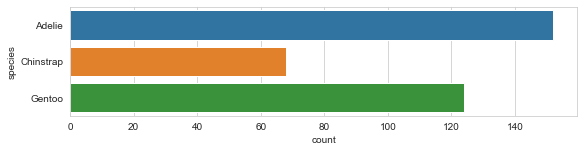

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
df_peng = sns.load_dataset("penguins")   # data
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 2), constrained_layout=True)   # figure + axes
sns.countplot(y="species", data=df_peng, ax=axs)   # draw countplot
p1, p2, p3 = axs.patches[0], axs.patches[1], axs.patches[2]

In [18]:
p1   # axes.patches 중 하나의 patch.(여기서는 0번째 patch) >> Rectangle 모양.

In [19]:
p1.get_fc()   # axes.patches 중 p1 patch의 face-color를 리턴하는 메서드 >> (Red, Green, Blue, Alpha) 값을 리턴.

(0.19460784313725488, 0.45343137254901944, 0.632843137254902, 1.0)

In [20]:
c1 = p1.get_fc()
c1

(0.19460784313725488, 0.45343137254901944, 0.632843137254902, 1.0)

In [21]:
mcolors

<module 'matplotlib.colors' from '/Users/hwan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/colors.py'>

In [22]:
mcolors.to_rgba(c1)

(0.19460784313725488, 0.45343137254901944, 0.632843137254902, 1.0)

In [23]:
c_rgba = mcolors.to_rgba(c1)
print('** c_rgba:', c_rgba)
print('** type of c_rgba:', type(c_rgba))

print()

c_rgb = c_rgba[:3]
alpha = c_rgba[3]
print('** c_rgb:', c_rgb)
print('** alpha:', alpha)

** c_rgba: (0.19460784313725488, 0.45343137254901944, 0.632843137254902, 1.0)
** type of c_rgba: <class 'tuple'>

** c_rgb: (0.19460784313725488, 0.45343137254901944, 0.632843137254902)
** alpha: 1.0


In [24]:
c_hls = colorsys.rgb_to_hls(*c_rgb)
c_hls

(0.5682326621923939, 0.41372549019607846, 0.5296208530805688)

In [25]:
c1 = p1.get_fc()
display(c1, type(c1))

(0.19460784313725488, 0.45343137254901944, 0.632843137254902, 1.0)

tuple

In [26]:
display(    mcolors,    type(mcolors)   )

<module 'matplotlib.colors' from '/Users/hwan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/colors.py'>

module

In [27]:
c_rgba = mcolors.to_rgba(c1)
display(   c_rgba,    type(c_rgba)   )

(0.19460784313725488, 0.45343137254901944, 0.632843137254902, 1.0)

tuple

In [28]:
for idx, p in enumerate(axs.patches):
    if idx == 1:
        #fc = s
        fc = set_hls(p1.get_fc(), ds=0.2)

In [29]:
# 응용
for idx, p in enumerate(axs.patches): 
    if idx in ([0,2]):
        fc = set_hls(p.get_fc(), ds=0.2)

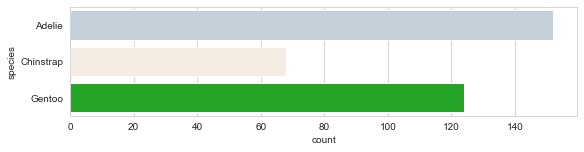

In [30]:
for i, p in enumerate(axs.patches):
    if i < 2:
        fc = set_hls(p.get_fc(), dl=0.4, ds=-0.3)
    else:
        fc = set_hls(p.get_fc(), ds=0.2)
    p.set_fc(fc)
    
display(fig)

In [31]:
ax = axs

In [32]:
for p in ax.patches:
    print(p)

Rectangle(xy=(0, -0.4), width=152, height=0.8, angle=0)
Rectangle(xy=(0, 0.6), width=68, height=0.8, angle=0)
Rectangle(xy=(0, 1.6), width=124, height=0.8, angle=0)


In [33]:
ax.patches[0]

In [34]:
arr = ax.patches[0].get_fc()

In [35]:
set_hls(arr)

array([0.77095298, 0.82147621, 0.856498  , 1.        ])

In [37]:
c_rgba = mcolors.to_rgba(c1)

In [38]:
import matplotlib.colors as mcolors
import colorsys

def set_hls(c, dh=0, dl=0, ds=0, dalpha=0):
    """
    c : (array -like, str) color in RGB space
    dh : (float) change in Hue
        default = 0
    dl : (float) change in Lightness
        default = 0
    ds : (float) change in Saturation
        default = 0
    """
    # 입력된 color를 RGBA numpy array로 변환
    c_rgba = mcolors.to_rgba(c)
    
    # RGB와 alpha 분리
    c_rgb = c_rgba[:3]
    alpha = c_rgba[3]
    
    # RGB 색공간을 HLS 색공간으로 변환 후 입력된 변화 적용
    c_hls = colorsys.rgb_to_hls(*c_rgb)
    h = c_hls[0] + dh
    l = max(min(c_hls[1] + dl, 1), 0)     # 0~1 범위를 넘지 않도록 제어
    s = max(min(c_hls[2] + ds, 1), 0)     # 0~1 범위를 넘지 않도록 제어
    
    # HLS 색공간에서 변경된 색을 RGB 색공간으로 변환
    c_rgb_new = colorsys.hls_to_rgb(h, l, s)
    alpha = max(min(alpha+dalpha, 1), 0)  # 0~1 범위를 넘지 않도록 제어
    
    return np.append(c_rgb_new, alpha) # alpha 추가하여 return

#### matplotlib & ax object - [Basic plots]
 - https://matplotlib.org/stable/plot_types/index.html

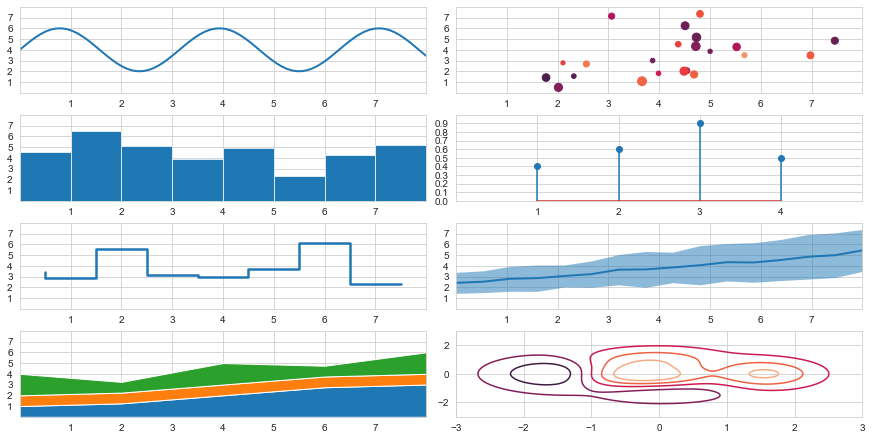

In [39]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(12,6),
                        constrained_layout=True,
                        sharex=False, sharey=False)

# axs[0,0] - line plot
x = np.linspace(0, 10, 100)
y = 4 + 2 * np.sin(2*x)
axs[0,0].plot(x, y, linewidth=2.0)
axs[0,0].set(xlim=(0, 8), xticks=np.arange(1, 8), ylim=(0, 8), yticks=np.arange(1, 8))

# axs[0,1] - scatter plot
x = 4 + np.random.normal(0, 2, 24)
y = 4 + np.random.normal(0, 2, len(x))
sizes = np.random.uniform(15, 80, len(x))
colors = np.random.uniform(15, 80, len(x))
axs[0,1].scatter(x, y, s=sizes, c=colors, vmin=0, vmax=100)
axs[0,1].set(xlim=(0,8), xticks=np.arange(1,8), ylim=(0,8), yticks=np.arange(1,8))

# axs[1,0] - bar plot
x = 0.5 + np.arange(8)
y = np.random.uniform(2, 7, len(x))
axs[1,0].bar(x, y, width=1, edgecolor='white', linewidth=0.7)
axs[1,0].set(xlim=(0,8), xticks=np.arange(1,8), ylim=(0,8), yticks=np.arange(1,8))

# axs[1,1] - stem plot
# x = 0.5 + np.arange(8)
# y = np.random.uniform(2, 7, len(x))
# axs[1,1].stem(x, y)
# axs[1,1].set(xlim=(0,8), xticks=np.arange(1,8), ylim=(0,8), yticks=np.arange(1,8))

# axs[1,1] - stem plot
x = [1, 2, 3, 4]
y = [0.4, 0.6, 0.9, 0.5]
axs[1,1].stem(x, y)
axs[1,1].set(xlim=(0,5), xticks=np.arange(1,5), ylim=(0,1), yticks=np.arange(0,1,0.1))

# axs[2,0] - step plot
x = 0.5 + np.arange(8)
y = np.random.uniform(2, 7, len(x))
axs[2,0].step(x, y, linewidth=2.5)
axs[2,0].set(xlim=(0,8), xticks=np.arange(1,8), ylim=(0,8), yticks=np.arange(1,8))

# axs[2,1] - fill_between plot
x =np.linspace(0, 8, 16)
y1 = 3 + 4*x/8 + np.random.uniform(0, 0.5, len(x))
y2 = 1 + 2*x/8 + np.random.uniform(0, 0.5, len(x))
axs[2,1].fill_between(x, y1, y2, alpha=0.5, linewidth=0)
axs[2,1].plot(x, (y1+y2)/2, linewidth=2)
axs[2,1].set(xlim=(0,8), xticks=np.arange(1,8), ylim=(0,8), yticks=np.arange(1,8))

# axs[3,0] - stackplot
x = np.arange(0, 10, 2)
ay = [1, 1.25, 2, 2.75, 3]
by = [1, 1, 1, 1, 1]
cy = [2, 1, 2, 1, 2]
y = np.vstack([ay, by, cy])
axs[3,0].stackplot(x, y)
axs[3,0].set(xlim=(0,8), xticks=np.arange(1,8), ylim=(0,8), yticks=np.arange(1,8))

# axs[3,1] - contour(x,y,z)
x, y = np.meshgrid(np.linspace(-3, 3, 256), np.linspace(-3, 3, 256))
z = (1 - x/2 + x**5 + y**3) * np.exp(-x**2 - y**2)
levels = np.linspace(np.min(z), np.max(z), 7)
axs[3,1].contour(x, y, z, levels=levels)

plt.show()

#### matplotlib & ax object - [Statistics plots]
 - https://matplotlib.org/stable/plot_types/index.html

/var/folders/0x/wx95jk3n37s0t7ywgmz5jqz40000gn/T/ipykernel_69579/1915044111.py:50: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  axs[2,1].hist2d(x, y, bins=(np.arange(-3, 3, 0.1), np.arange(-3, 3, 0.1)))


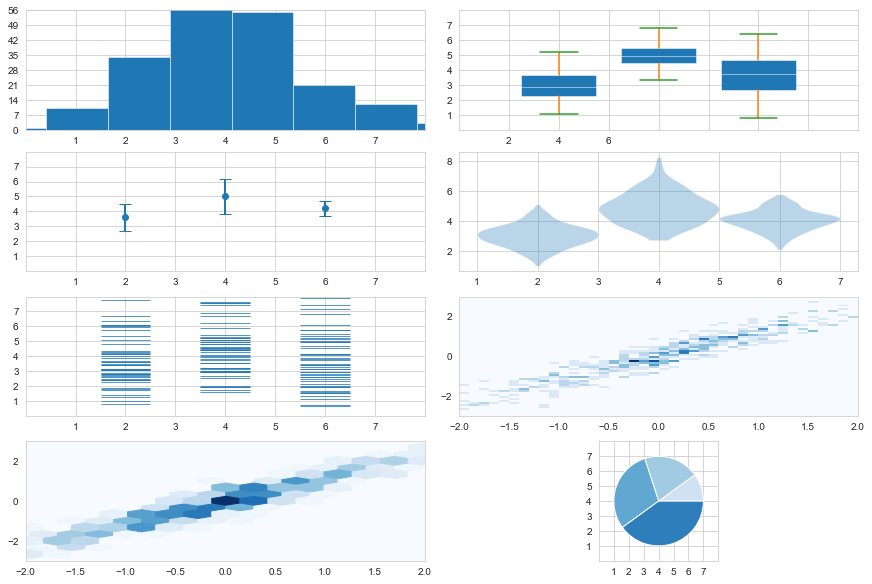

In [40]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(12,8),
                        constrained_layout=True,
                        sharex=False, sharey=False)


# axs[0,0] - histogram
x = 4 + np.random.normal(0, 1.5, 200)
axs[0,0].hist(x, bins=8, linewidth=0.5, edgecolor='white')
axs[0,0].set(xlim=(0,8), xticks=np.arange(1,8), ylim=(0,56), yticks=np.linspace(0,56,9))


# axs[0,1] - boxplot
d = np.random.normal((3,5,4), (1.25,1.00, 1.25), (100,3))
vp = axs[0,1].boxplot(d, positions=[2,4,6], widths=1.5, patch_artist=True,
                      showmeans=False, showfliers=False,
                      medianprops={'color':'white', 'linewidth':0.5},
                      boxprops={'facecolor':'C0', 'edgecolor':'white', 'linewidth':0.5},
                      whiskerprops={'color':'C1', 'linewidth':1.5},
                      capprops={'color':'C2', 'linewidth':1.5})
axs[0,1].set(xlim=(0,8), xticks=np.arange(1,8), ylim=(0,8), yticks=np.arange(1,8))


# axs[1,0] - errorbar
x = [2, 4, 6]
y = [3.6, 5, 4.2]
yerr = [0.9, 1.2, 0.5]
axs[1,0].errorbar(x, y, yerr, fmt='o', linewidth=2, capsize=6)
axs[1,0].set(xlim=(0,8), xticks=np.arange(1,8), ylim=(0,8), yticks=np.arange(1,8))


# axs[1,1] - violinplot
d = np.random.normal((3,5,4), (0.75,1.00,0.75), (200,3))
vp = axs[1,1].violinplot(d, [2,4,6], widths=2, showmeans=False, showmedians=False, showextrema=False)
# for body in vp['bodies']:
#     body.set_alpha(0.9)
# axs[1,1].set(xlim=(0,8), xticks=np.arange(1,8), ylim=(0,8), yticks=np.arange(1,8))


# axs[2,0] - eventplot
x = [2, 4, 6]
d = np.random.gamma(4, size=(3, 50))
axs[2,0].eventplot(d, orientation='vertical', lineoffsets=x, linewidth=0.75)
axs[2,0].set(xlim=(0,8), xticks=np.arange(1,8), ylim=(0,8), yticks=np.arange(1,8))


# axs[2,1] - 2d histogram
x = np.random.randn(500)
y = 1.2 * x + np.random.randn(500) / 3
plt.style.use('_mpl-gallery-nogrid')
axs[2,1].hist2d(x, y, bins=(np.arange(-3, 3, 0.1), np.arange(-3, 3, 0.1)))
axs[2,1].set(xlim=(-2, 2), ylim=(-3, 3))


# axs[3,0] - hexbin plot
x = np.random.randn(500)
y = 1.2 * x + np.random.randn(500)/3
axs[3,0].hexbin(x, y, gridsize=20)
axs[3,0].set(xlim=(-2,2), ylim=(-3,3))


# axs[3,1] - pie plot
x = [1, 2, 3, 4]
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(x)))
axs[3,1].pie(x, colors=colors, radius=3, center=(4,4), 
             wedgeprops={'linewidth':1, 'edgecolor':'white'},
             frame=True)
axs[3,1].set(xlim=(0,8), xticks=np.arange(1,8), ylim=(0,8), yticks=np.arange(1,8))

plt.show()

#### E.O.D